
**Semana 6: Data Analysis with Python (IBM) Módulo 3**

**Nombre: Alexis Hernández Martínez**

**Matrícula: A01016308**

**Materia: Ciencia y Analítica de Datos**

**Profesor: Jobish Vallikavungal Devassia**

**Fecha: Martes 18 Octubre 2022**


**Parte 1: Notebooks del Módulo 3**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline 

In [2]:
# Descargamos el archivo, bajamos la info a path y mostramos los primeros cinco renglones

path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

coches = pd.read_csv(path)
coches.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# Los tipos de información para cada columna

print(coches.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [4]:
# Correlaciones entre todas las columnas del archivo

coches.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [5]:
# Encontrar la correlación entre 4 columnas

coches[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


(0.0, 53698.595140299905)

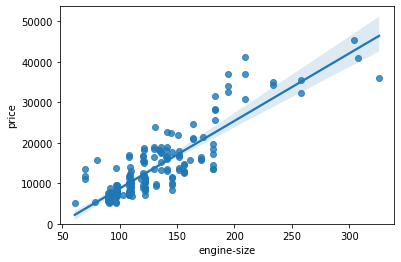

In [6]:
# Graficamos la columna de tamaño del motor vs precio para observar si hay una correlación entre ambas

sns.regplot(x="engine-size", y="price", data=coches)
plt.ylim(0,)

In [7]:
# Correlación entre ambas variables

coches[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot: xlabel='highway-mpg', ylabel='price'>

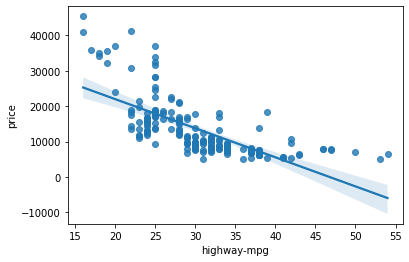

In [8]:
# Repetimos el experimento, ahora para las variables highway-mpg y precio

sns.regplot(x="highway-mpg", y="price", data=coches)

In [9]:
# Repetimos la función de correlación ahora para las nuevas variables

coches[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


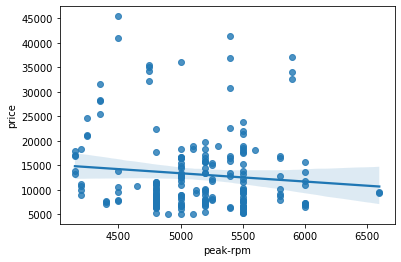

In [10]:
# A manera de prueba, se repiten los experimentos ahora para ver el caso de variables no relacionadas

sns.regplot(x="peak-rpm", y="price", data=coches)
coches[['peak-rpm','price']].corr()

<AxesSubplot: xlabel='body-style', ylabel='price'>

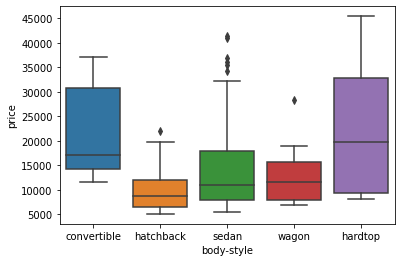

In [11]:
# A continuación, se usa la función de boxplot para hacer un resumen gráfico de la relación entre 
# bodystyle y precio, como podemos ver la mayoría de estas categorías están overlap entonces no hay una clara 
# relación entre una y la otra

sns.boxplot(x="body-style", y="price", data=coches)

<AxesSubplot: xlabel='engine-location', ylabel='price'>

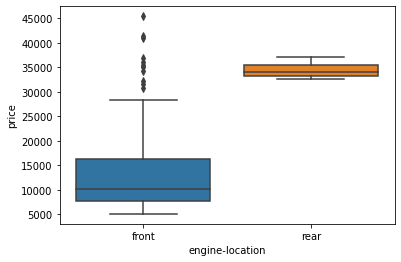

In [12]:
# Caso contrario, para engine-location y precio si hay una clara relación entre una clasificación y otra
# provoca un cambio de precio considerable

sns.boxplot(x="engine-location", y="price", data=coches)

<AxesSubplot: xlabel='drive-wheels', ylabel='price'>

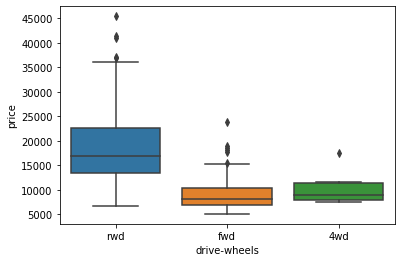

In [13]:
# En este caso, la variable drive-wheels es potencialmente un buen correlacionador con precio, pues 
# las cajas de color azul y naranja si tienen una clara diferencia, aunque con la color verde no tanto

sns.boxplot(x="drive-wheels", y="price", data=coches)

In [14]:
# Función describe de los DataFrame, en este argumento incluimos el parámetro include=object para poder
# poder integrar al análisis las columnas que tengan data de tipo objeto

coches.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [15]:
# La función de value_counts nos ayuda a contar la cantidad de argumentos que cada clasificación tiene dentro 
# de la columna, anexamos un ejemplo con la columna de drive-wheels

coches['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [16]:
# Este argumento se puede pasar a un dataframe nuevo, hacemos eso y cambiamos nombre de la columna

drive_wheels_counts = coches['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [17]:
# Aquí solamente renombramos la columna de los índices para facilidad de entendimiento

drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [18]:
# Repetimos los pasos anteriores para la variable de engine-location

# engine-location as variable
engine_loc_counts = coches['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


In [19]:
# Encontramos los valores únicos de la columna drive-wheels y el tipo de data que tienen incluida

coches['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [20]:
# Aquí agrupamos las tres columnas de drive-wheels, body-style y precio, y le sacamos el promedio 
# al precio de cada una de las clasificaciones que tenemos

coches_group_one = coches[['drive-wheels','body-style','price']]
coches_group_one = coches_group_one.groupby(['drive-wheels'],as_index=False).mean()
coches_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [21]:
# Aquí agrupamos por medio de dos variables, tanto drive-wheels como body-style

coches_gptest = coches[['drive-wheels','body-style','price']]
grouped_test1 = coches_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [22]:
# En esta línea, desplegamos la misma información pero en un formato de pivote, para facilidad de análisis

grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [23]:
# Se reemplazan los valores en NaN con valores 0 

grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

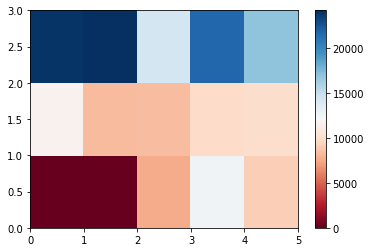

In [24]:
# Usamos un mapa de calor para desplegar con colores, la correlación entre las variables body-style y precio

plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

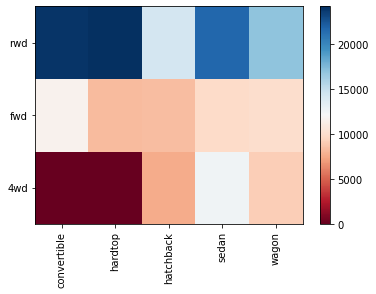

In [25]:
# En estas líneas, se codifica para poner etiquetas al mapa de calor con el objetivo de entender mejor

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# Se colocan el nombre de las etiquetas
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# Se mueven las etiquetas al centro
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# Se insertan las etiquetas
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# Rotación de la etiqueta si es muy larga
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [26]:
# Se aplica correlación de Pearson al DataFrame original

coches.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [27]:
# Se aplica correlación de Pearson para las dos variables wheel-base y precio

pearson_coef, p_value = stats.pearsonr(coches['wheel-base'], coches['price'])
print("El coeficiente de correlación es", pearson_coef, " con un p-value de P =", p_value)  

El coeficiente de correlación es 0.5846418222655085  con un p-value de P = 8.076488270732243e-20


In [28]:
# Para el análisis de ANOVA, nuevamente agrupamos variables 

grouped_test2=coches_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [29]:
# Con esta función, sacamos específicamente los renglones que hagan match con el valor de "4wd"

grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [30]:
# Se realiza el cálculo de ANOVA al obtener el F-score y el valor de P

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
print( "Resultados de ANOVA: F=", f_val, ", P =", p_val)  

Resultados de ANOVA: F= 67.95406500780399 , P = 3.3945443577151245e-23


In [31]:
# Se realiza el mismo cálculo para las columnas de  fwd y rwd / 4wd y rwd / 4wd y fwd

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
print( "Resultados de ANOVA: F=", f_val, ", P =", p_val )

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
print( "Resultados de ANOVA: F=", f_val, ", P =", p_val) 

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
print( "Resultados de ANOVA: F=", f_val, ", P =", p_val) 

Resultados de ANOVA: F= 130.5533160959111 , P = 2.2355306355677845e-23
Resultados de ANOVA: F= 8.580681368924756 , P = 0.004411492211225333
Resultados de ANOVA: F= 0.665465750252303 , P = 0.41620116697845666


**Parte 2: Graded Review Questions**

Se anexa screenshot de la realización del Graded Review Questions para el Módulo 3 del curso Data Analysis with Python

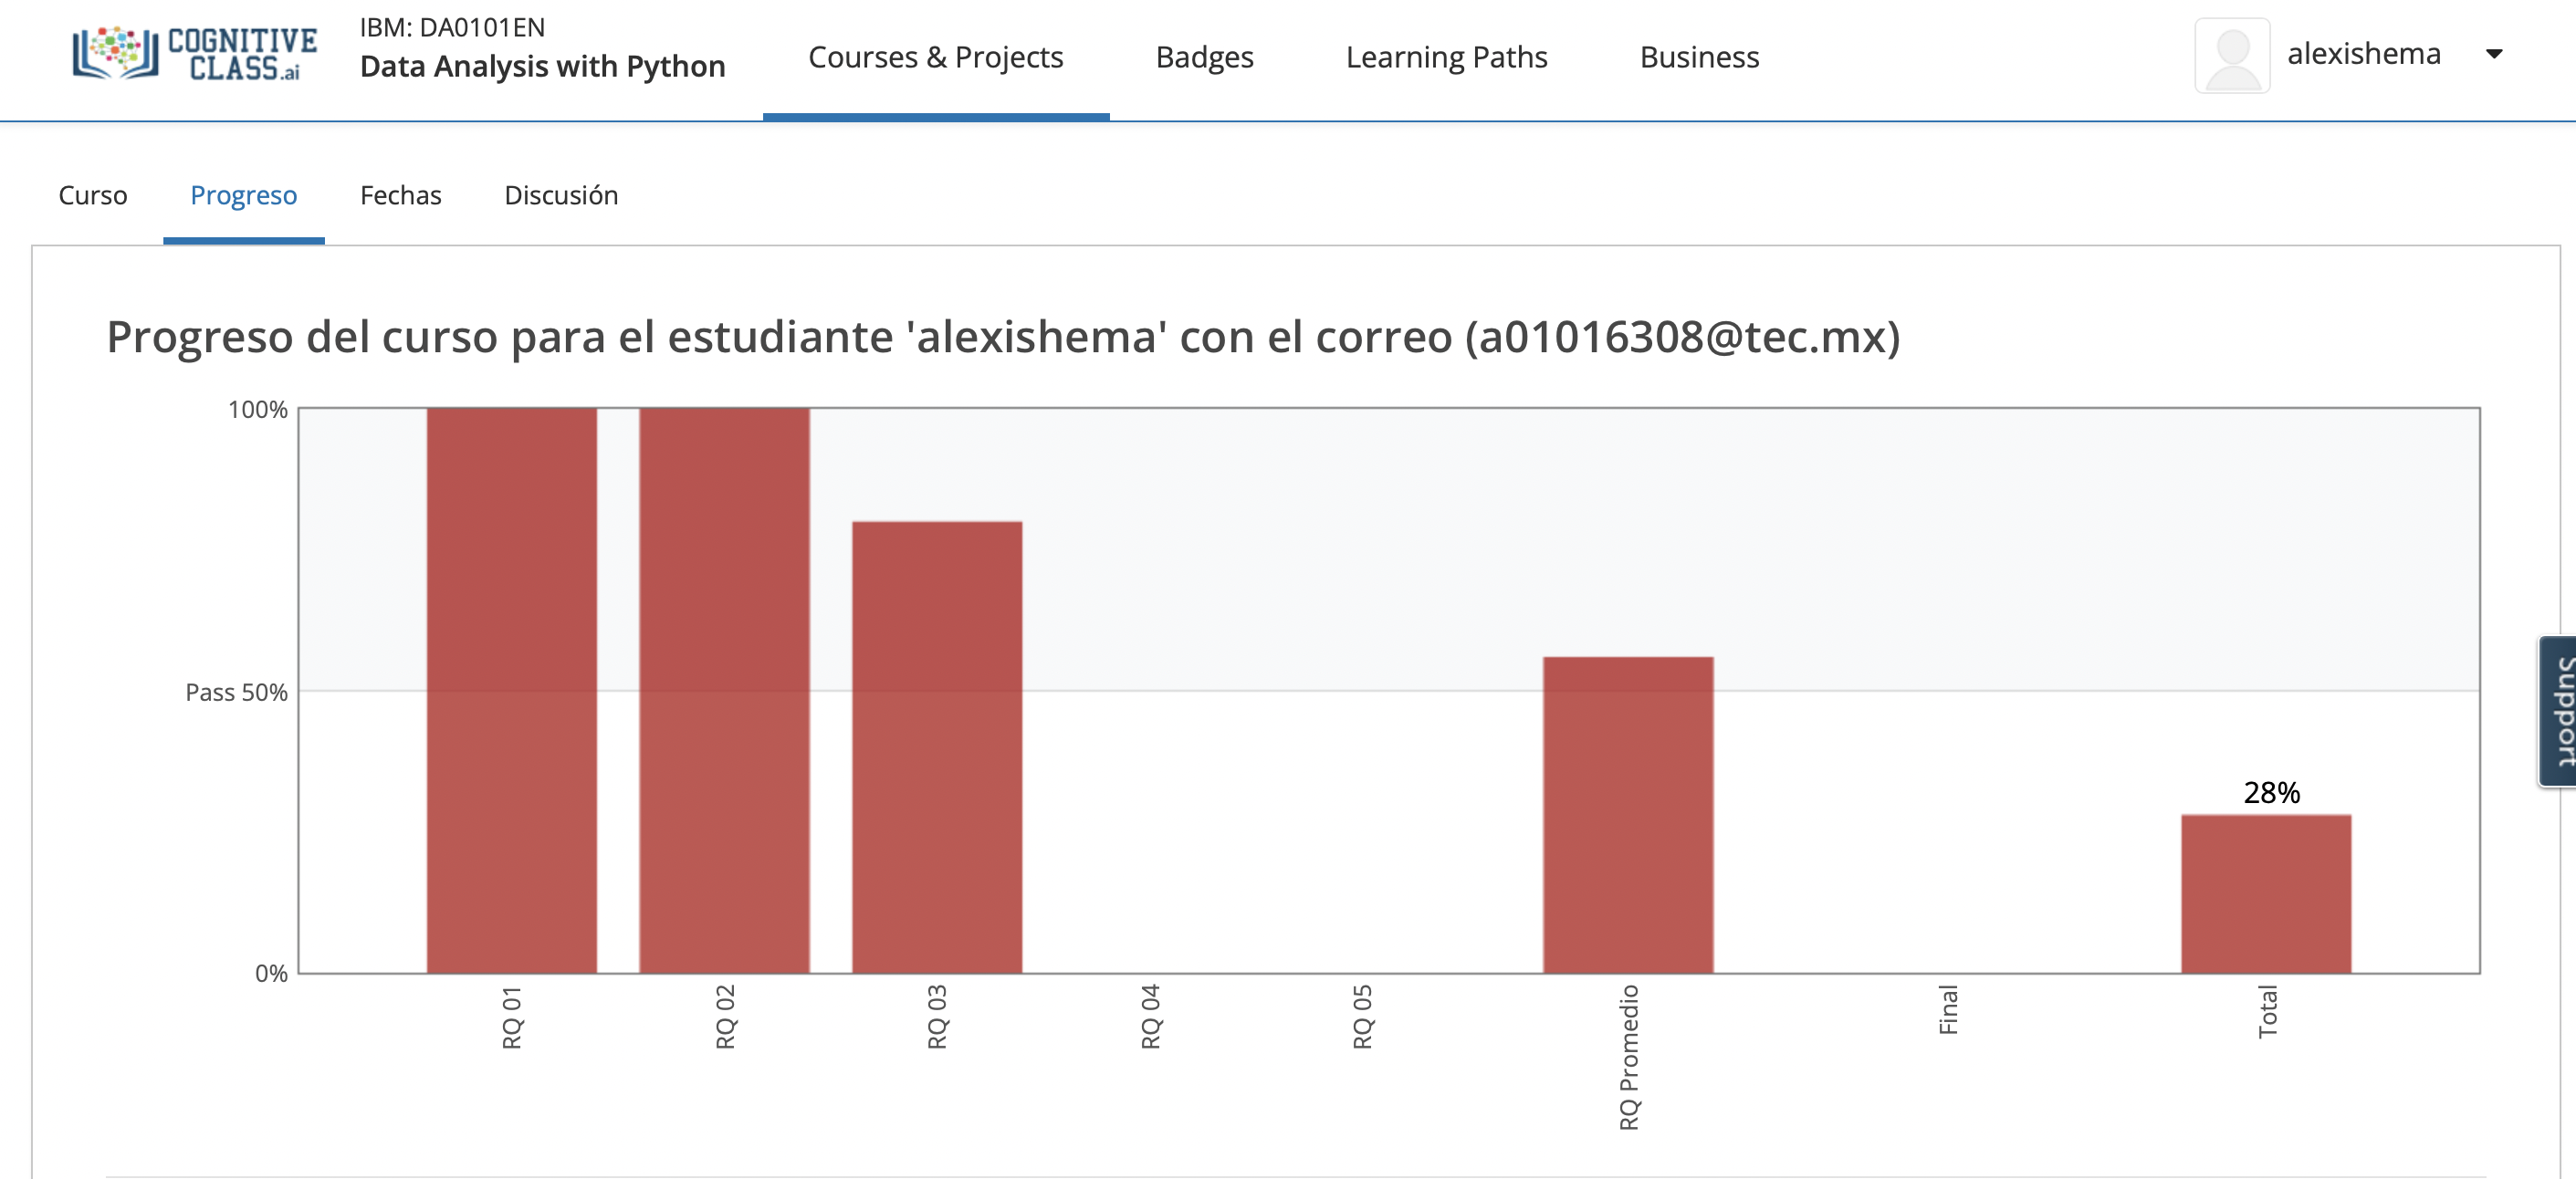